# Wine Quality Classifier Analysis

In [57]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


Model: Logistic Regression
K-Fold Cross-Validation Scores: [1.         0.97222222 1.         0.97142857 1.        ]
Mean K-Fold CV Accuracy: 0.9887301587301588
Best Parameters: {'C': 0.1}
Accuracy: 0.9722222222222222
F1 Score: 0.9725248123940935
ROC AUC Score: 0.9821428571428572
Confusion Matrix:
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
-----------------------------------------


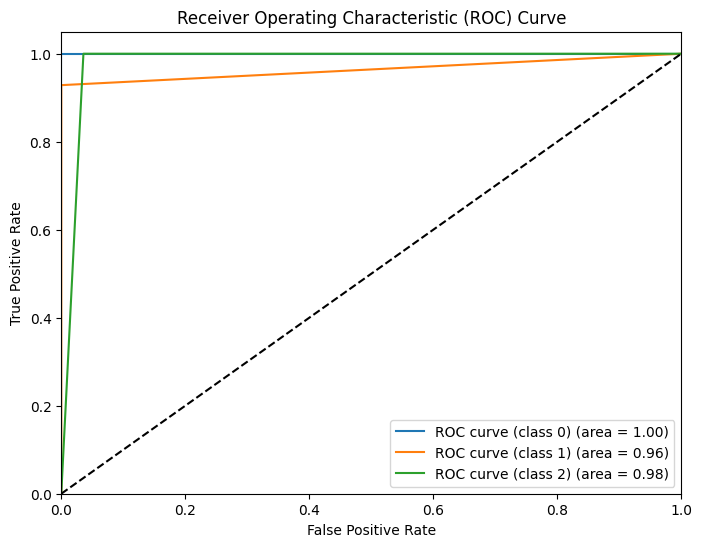

-----------------------------------------

Model: Decision Tree
K-Fold Cross-Validation Scores: [0.94444444 0.80555556 0.88888889 0.88571429 0.88571429]
Mean K-Fold CV Accuracy: 0.882063492063492
Best Parameters: {'max_depth': 10}
Accuracy: 0.9444444444444444
F1 Score: 0.9439974457215836
ROC AUC Score: 0.9521103896103896
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
-----------------------------------------


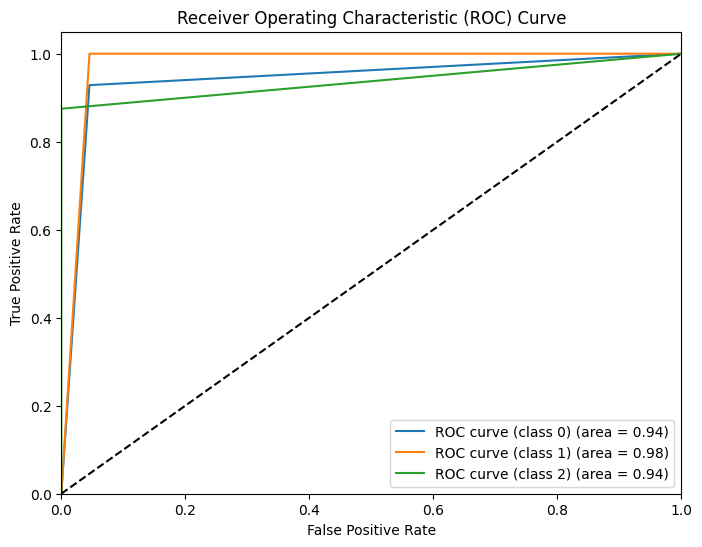

-----------------------------------------

Model: Random Forest
K-Fold Cross-Validation Scores: [1.         1.         0.94444444 0.97142857 1.        ]
Mean K-Fold CV Accuracy: 0.9831746031746033
Best Parameters: {'max_depth': None, 'n_estimators': 500}
Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
-----------------------------------------


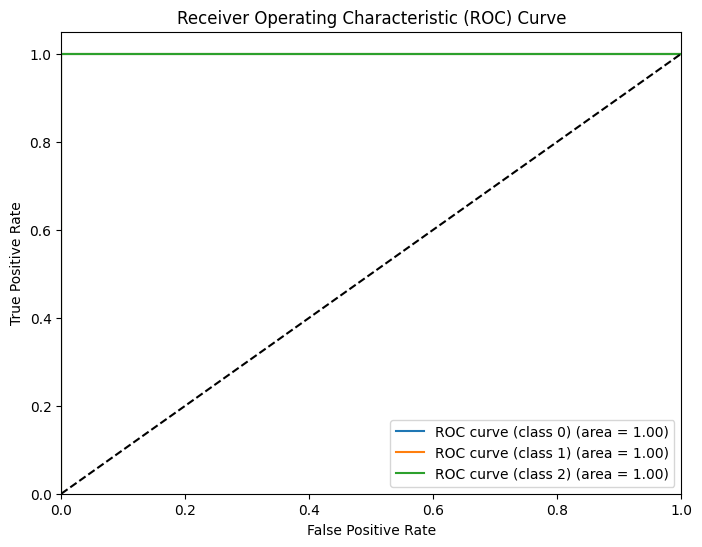

-----------------------------------------

Model: SVM
K-Fold Cross-Validation Scores: [1.         0.97222222 0.97222222 0.97142857 0.97142857]
Mean K-Fold CV Accuracy: 0.9774603174603176
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.9722222222222222
F1 Score: 0.9725248123940935
ROC AUC Score: 0.9821428571428572
Confusion Matrix:
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
-----------------------------------------


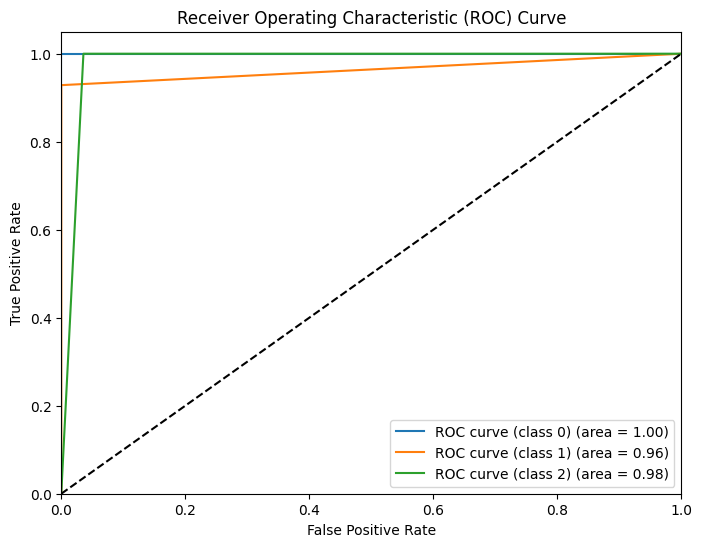

-----------------------------------------

Model: KNN
K-Fold Cross-Validation Scores: [0.94444444 0.94444444 0.97222222 0.91428571 0.97142857]
Mean K-Fold CV Accuracy: 0.9493650793650794
Best Parameters: {'n_neighbors': 9}
Accuracy: 0.9722222222222222
F1 Score: 0.9725248123940935
ROC AUC Score: 0.9821428571428572
Confusion Matrix:
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
-----------------------------------------


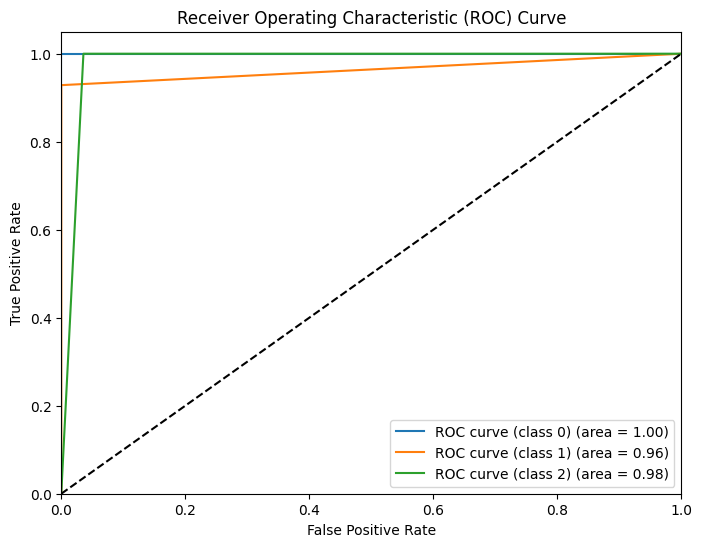

-----------------------------------------

Model: Naive Bayes
K-Fold Cross-Validation Scores: [1.         1.         0.97222222 0.94285714 1.        ]
Mean K-Fold CV Accuracy: 0.9830158730158731
Accuracy: 0.9722222222222222
F1 Score: 0.9721867461331064
ROC AUC Score: 0.9805194805194805
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
-----------------------------------------


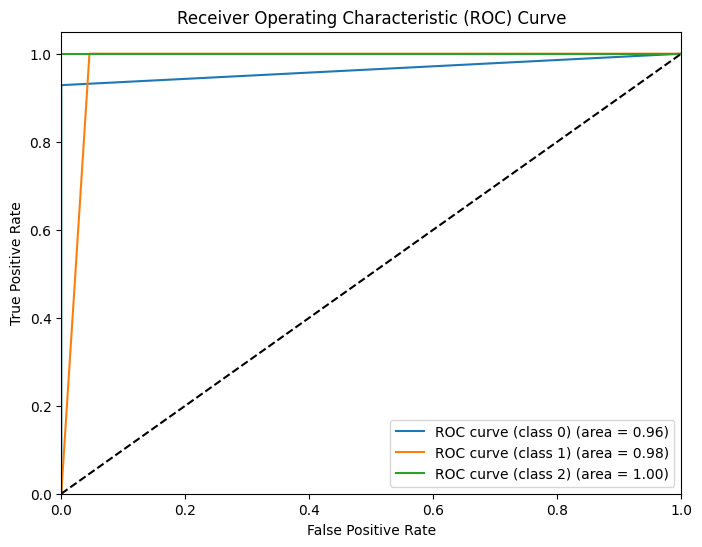

-----------------------------------------

Model: Gradient Boosting
K-Fold Cross-Validation Scores: [0.94444444 0.94444444 0.91666667 0.97142857 0.94285714]
Mean K-Fold CV Accuracy: 0.943968253968254
Best Parameters: {'learning_rate': 1, 'n_estimators': 50}
Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
-----------------------------------------


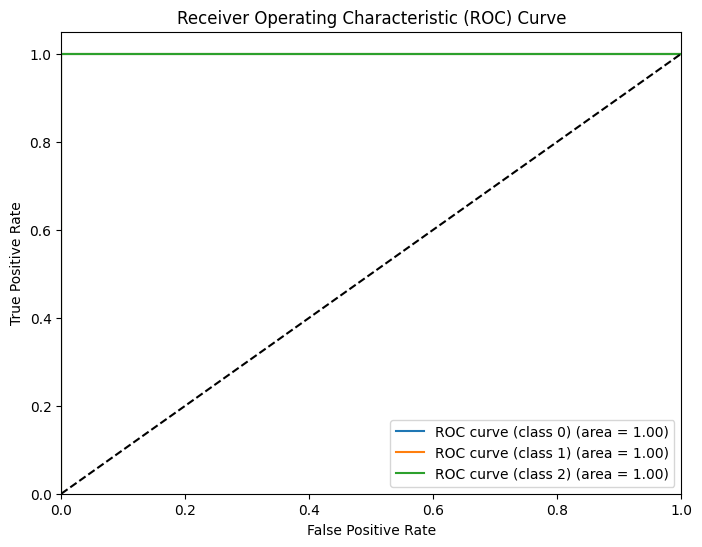

-----------------------------------------

Model: AdaBoost
K-Fold Cross-Validation Scores: [0.91666667 0.86111111 0.72222222 0.94285714 1.        ]
Mean K-Fold CV Accuracy: 0.8885714285714286
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Accuracy: 0.9166666666666666
F1 Score: 0.9146141215106732
ROC AUC Score: 0.9237012987012987
Confusion Matrix:
[[14  0  0]
 [ 1 13  0]
 [ 0  2  6]]
-----------------------------------------


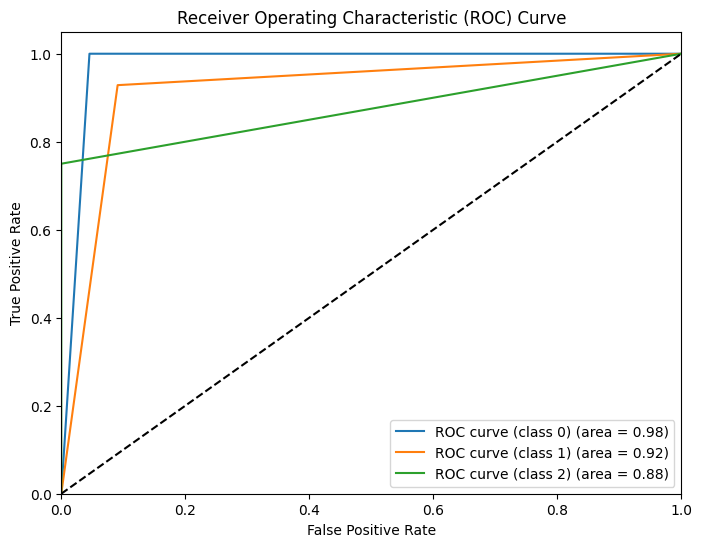

-----------------------------------------


In [58]:
# Load the Wine dataset
wine_data = load_wine()

# Split the dataset into features (X) and labels (y)
X = wine_data.data
y = wine_data.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load Scaler
scaler = StandardScaler()

# Scale dataset
X_scale = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize models with default parameters
logistic_regression_model = LogisticRegression(max_iter=10000)
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()
gradient_boosting_model = GradientBoostingClassifier()
adaboost_model = AdaBoostClassifier()

# Models dictionary for easier iteration
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Naive Bayes": naive_bayes_model,
    "Gradient Boosting": gradient_boosting_model,
    "AdaBoost": adaboost_model
}

# Grid search parameters for each model
grid_search_params = {
    "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Decision Tree": {'max_depth': [None, 5, 10, 15, 20, 30, 50, 70, 100]},
    "Random Forest": {'n_estimators': [50, 100, 200, 500], 'max_depth': [None, 5, 10, 15, 20]},
    "SVM": {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
    "KNN": {'n_neighbors': [3, 5, 7, 9, 11]},
    "Naive Bayes": {},
    "Gradient Boosting": {'n_estimators': [50, 100, 200, 500], 'learning_rate': [0.01, 0.1, 0.5, 1]},
    "AdaBoost": {'n_estimators': [50, 100, 200, 500], 'learning_rate': [0.01, 0.1, 0.5, 1]}
}

# Evaluate each model
for name, model in models.items():
    print("\nModel:", name)

    # # Cross-validation
    # cross_val_scores = cross_val_score(model, X, y, cv=num_folds)
    # print("Cross-Validation Scores:", cross_val_scores)
    # print("Mean CV Accuracy:", cross_val_scores.mean())

    # K-fold cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    kfold_cross_val_scores = cross_val_score(model, X_scale, y, cv=kf)
    print("K-Fold Cross-Validation Scores:", kfold_cross_val_scores)
    print("Mean K-Fold CV Accuracy:", kfold_cross_val_scores.mean())

    # Hyperparameter tuning using GridSearchCV
    if grid_search_params[name]:
        grid_search = GridSearchCV(estimator=model, param_grid=grid_search_params[name], cv=kf)
        grid_search.fit(X_train_scaled, y_train)
        best_params = grid_search.best_params_
        print("Best Parameters:", best_params)
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_scaled, y_train)
        y_pred = best_model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Calculate accuracy and confusion matrix for the test set
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate ROC AUC score
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    y_pred_binarized = label_binarize(y_pred, classes=np.unique(y))
    roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro')


    # Use F1 score to correctly classifiy between wines as Recall or Precision are both important
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("-----------------------------------------")

    # Compute ROC curve and ROC area for each class
    n_classes = len(np.unique(y))
    fpr = dict()
    tpr = dict()
    roc_auc_class = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc_class[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc_class[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    print("-----------------------------------------")
